# Short Assignment 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Problem 1 - Support Vector Machine

In this problem you will be working with 3 different synthetically generated datasets, experiment with different parameters of the SVM classifiers and draw conclusions about its behavior.

Consider the following 3 2-class datasets (X1, X2, and X3):

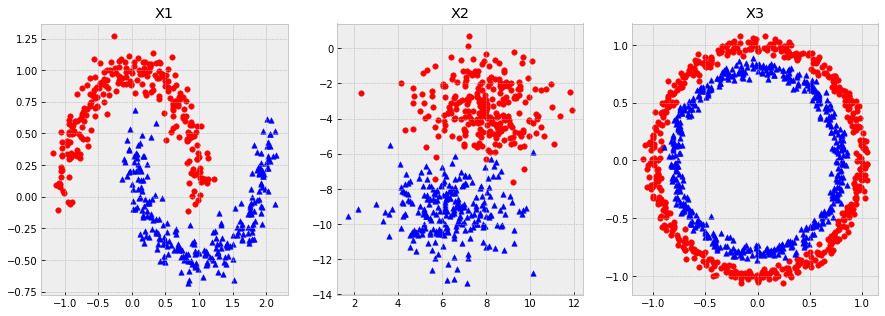

In [2]:
# Generate Synthetic Data
from sklearn.datasets import make_moons, make_blobs, make_circles
X1, y1 = make_moons(n_samples=500, noise=0.1, random_state=6)
X2, y2 = make_blobs(n_samples=500, centers=2, cluster_std = 1.5, random_state=6)
X3, y3 = make_circles(n_samples=1000, noise=0.04, random_state=6)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X1[y1==0,0],X1[y1==0,1],marker='o',c='r',s=30)
plt.scatter(X1[y1==1,0],X1[y1==1,1],marker='^',c='b',s=30)
plt.title('X1')

plt.subplot(1,3,2)
plt.scatter(X2[y2==0,0],X2[y2==0,1],marker='o',c='r',s=30)
plt.scatter(X2[y2==1,0],X2[y2==1,1],marker='^',c='b',s=30)
plt.title('X2')

plt.subplot(1,3,3)
plt.scatter(X3[y3==0,0],X3[y3==0,1],marker='o',c='r',s=30)
plt.scatter(X3[y3==1,0],X3[y3==1,1],marker='^',c='b',s=30)
plt.title('X3');

In the script provided below, provide:

* The dataset you will be experimenting with (X1 and y1, X2 and y2, or X3 and y3).
* Kernel used in SVM (rbf, polynomial, linear or sigmoid).
* Parameter C in SVM.

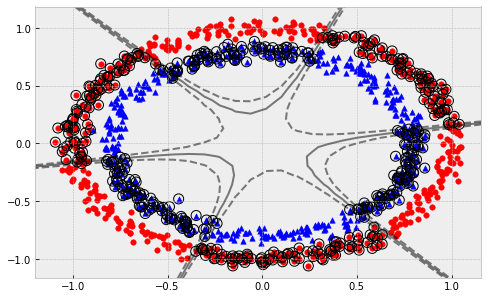

In [3]:
from sklearn import svm

### Hyperparameters of the Model ###
kernel = 'sigmoid'  # Change the kernel to "rbf", "poly", "linear" or "sigmoid"
# if you use the polynomial kernel, you may control its degree using the parameter "degree"

C = 1 # Change the value for the parameter C


##########################################################################################
### Dataset ###
X = X3 # choose the input data (X1, X2 or X3)
y = y3 # choose the correspondent target labels (y1, y2 or y3, respectively)

### Fit the Model###
clf = svm.SVC(kernel=kernel, C=C) # specify the parameter degree if kernel "poly" is used
clf.fit(X, y)

### Decision Surface ###
plt.figure(figsize=(8,5))
plt.scatter(X[y==0,0],X[y==0,1],marker='o',c='r',s=30)
plt.scatter(X[y==1,0],X[y==1,1],marker='^',c='b',s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30) # you may change the x-axis range
yy = np.linspace(ylim[0],ylim[1], 30) # you may change the y-axis range
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
);

Provide a paragraph description for the following questions:

1. Describe the effects on the width of the margin as you change the parameter $C$.

2. Describe the effects on the number of support vectors as you change the parameter $C$.

3. Describe the effects on the decision surface, namely its non-linearity as you change the parameter $C$.

4. If the test data will have the same statistical properties as the training data, which kernel would you choose to use for each dataset? Justify your answer based on (1) computational complexity, (2) ease of use, (3) overall effects on decision surface, and (4) any other parameter choices.

5. Predict which label the following point will be assigned to for several configurations of values for $C$ and kernel function used:
    * $[2,-2]$ for dataset X1
    * $[12,-15]$ for dataset X2
    * $[1,-1]$ for dataset X3

1) As the value of C is decreased, the width of the margin increases. This is because the value of C controls the effect that the slack variables have on the objective function. As C increases, we get closer and closer to recovering the hard margin SVM and as C decreases, we allow for more and more points to enter the margin and the margin becomes wider.

2) Since the margin becomes wider as C becomes smaller, there will be more points falling within the margin, meaning that there will be more support vectors as C decreases. As C becomes larger, the less points will be allowed to fall wihtin the margin and there will be less support vectors until the margin is maximized for the points that lie closest to the decision boundary (hard margin).

3) With a large C, meaning we are recovering the hard margin, the decision boundary becomes less linear as the line is designed to basically split the data as perfectly as possible. With the X1, y1 dataset it is clear that with a large C, the SVM will draw a decision boundary that will follow the curve that seperates the classes with the smallest amount of points within/across the boundary as possible. With a smaller C, meaning we allow for more points to fall within the boundary, we see the decision boundary flatten out (more linear). This can be attributed to the SVM not having to draw a super strict decision boundary since more points are being allowed to fall within the margin. This can be demonstrated with the X2, y2 dataset. As C becomes smaller, the decision boundary becomes almost completely linear.

4) Since RBF seems to produce the more accurate decision surface out of all the other kernels, I would choose RBF for almost every dataset. I would hope that the test data has similar/the same statistical properties as the training data, otherwise the training data wouldn't be providing the model with the best chance of succcess. RBF might result in a higher computational complexity, but it is easy to use and understand how C (slack variables) alter the decision surface. I would choose a conservative C that would be strict on the decision boundary but, also allow for some points to exist within the margin for better generalizability.

5) **RBF**<br>
    **X1 [2,-2]**<br>
    C = 0.01 : BLUE<br>
    C = 0.1 : BLUE<br>
    C = 1 : BLUE<br>
    C = 10 : BLUE<br>
   **X2 [12,-15]**<br>
    C = 0.01 : BLUE<br>
    C = 0.1 : BLUE<br>
    C = 1 : BLUE<br>
    C = 10 : BLUE<br>
   **X3 [1,-1]**<br>
    C = 0.01 : RED<br>
    C = 0.1 : RED<br>
    C = 1 : RED<br>
    C = 10 : RED<br>
    
   **SIGMOID**<br>
    **X1 [2,-2]**<br>
    C = 0.01 : BLUE<br>
    C = 0.1 : BLUE<br>
    C = 1 : BLUE<br>
    C = 10 : BLUE<br>
   **X2 [12,-15]**<br>
    C = 0.01 : RED<br>
    C = 0.1 : RED<br>
    C = 1 : RED<br>
    C = 10 : RED<br>
   **X3 [1,-1]**<br>
    C = 0.01 : RED<br>
    C = 0.1 : RED<br>
    C = 1 : RED<br>
    C = 10 : RED<br>
    
   **POLYNOMIAL**<br>
    **X1 [2,-2]**<br>
    C = 0.01 : BLUE<br>
    C = 0.1 : BLUE<br>
    C = 1 : BLUE<br>
    C = 10 : BLUE<br>
   **X2 [12,-15]**<br>
    C = 0.01 : BLUE<br>
    C = 0.1 : BLUE<br>
    C = 1 : BLUE<br>
    C = 10 : BLUE<br>
   **X3 [1,-1]**<br>
    C = 0.01 : RED<br>
    C = 0.1 : RED<br>
    C = 1 : RED<br>
    C = 10 : BLUE<br>

___

# Problem 2 - Learning Strategies

In this problem, you will be working with the data set "UF Network" shown below (make sure you download the file "UF_network.npy"):

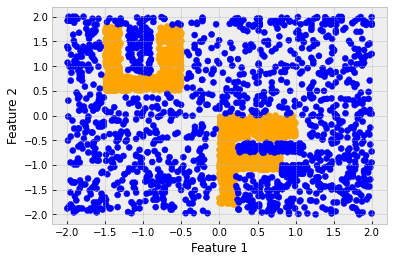

In [4]:
from matplotlib.colors import ListedColormap

UF_network = np.load('UF_network.npy')
X = UF_network[:,:2]
y = UF_network[:,2]

cm = ListedColormap(['blue', 'orange'])
plt.scatter(X[:,0],X[:,1],c=y, cmap=cm);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

The following function will be helpful for plotting the decision boundary of your trained model.

In [5]:
def plot_LC_and_DB(X, model):
    '''This function will plot the learning curve and decision boundary
    for a given trained model and training data X.
    model: is a sklearn model structure
    X: training data'''
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
    
    fig = plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.plot(model.loss_curve_)
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Function')

    cm = ListedColormap(['blue', 'orange'])
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    fig.add_subplot(1,2,2)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8);
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show();

For this problem, you will need to create a 2-hidden layer network to distinguish the letters and the background. Starter code is provided for you in the cell below, which uses ```scikit-learn``` library.

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Do not change these parameters
net = MLPClassifier(activation='tanh',
                    n_iter_no_change = 1000)

C:\Users\gusco\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 12)
Learning Rate:  0.005
Number of Epochs:  1000
Accuracy =  99.93 %
-----------------------------------


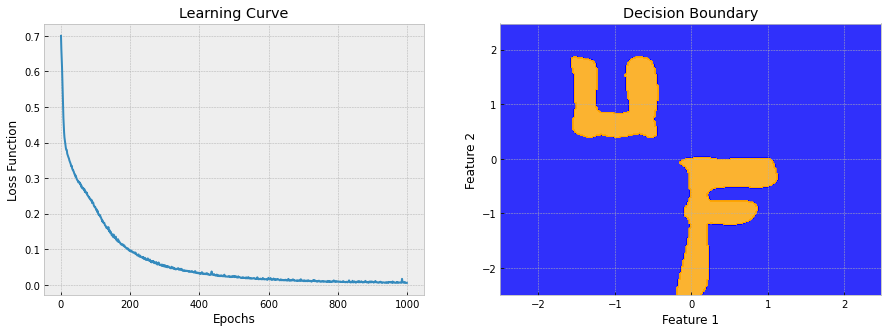

C:\Users\gusco\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 12)
Learning Rate:  0.005
Number of Epochs:  2500
Accuracy =  99.83 %
-----------------------------------


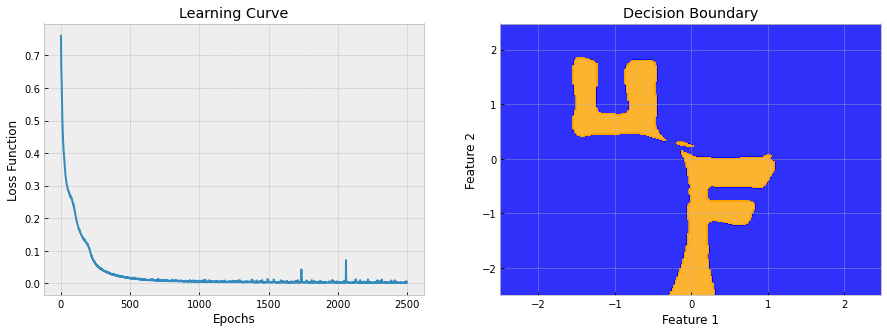

C:\Users\gusco\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 12)
Learning Rate:  0.05
Number of Epochs:  1000
Accuracy =  99.6 %
-----------------------------------


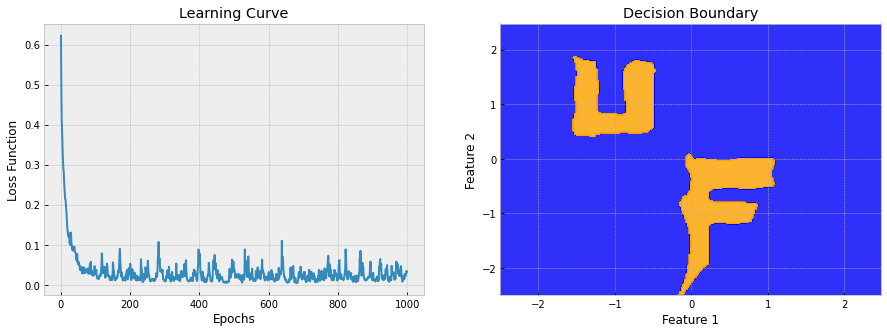

C:\Users\gusco\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 12)
Learning Rate:  0.05
Number of Epochs:  2500
Accuracy =  99.8 %
-----------------------------------


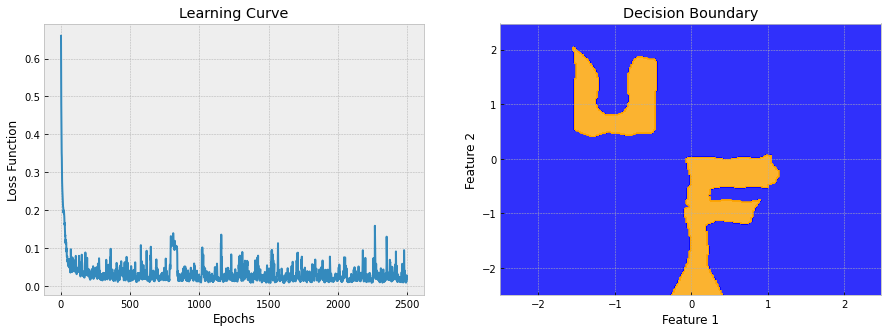

C:\Users\gusco\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 12)
Learning Rate:  0.5
Number of Epochs:  1000
Accuracy =  83.27 %
-----------------------------------


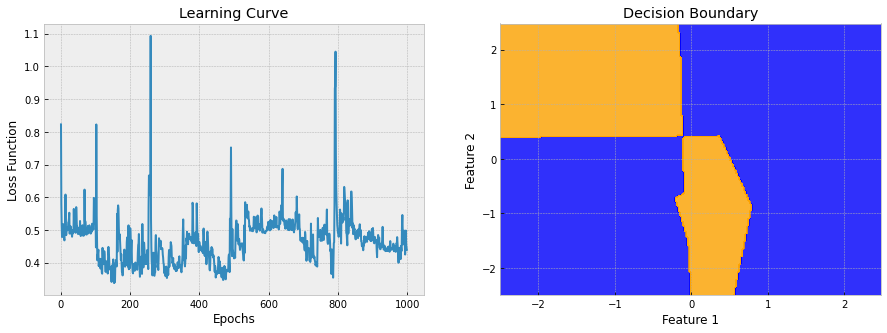

-----------------------------------
Hidden Layer Architecture:  (18, 12)
Learning Rate:  0.5
Number of Epochs:  2500
Accuracy =  74.53 %
-----------------------------------


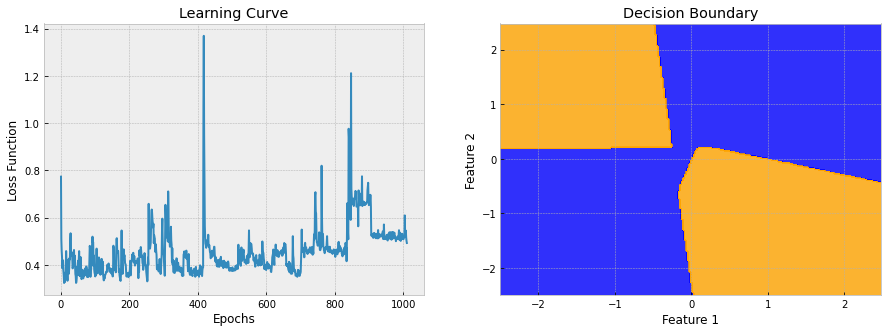

In [7]:
# Create a list with your own set of values for all of these parameters
net_hidden_layers = [(18,12)]# provide a list of tuples. If you want 2 hidden layers with 10 and 6 neurons, then pass (10,6)
net_learning_rate = [0.005,0.05,0.5]# provide a list of values
epochs = [1000,2500]# provide a list of values

for i in net_hidden_layers:
    for j in net_learning_rate:
        for k in epochs:
            net.set_params(hidden_layer_sizes = i, learning_rate_init = j, max_iter = k)
            net.fit(X, y)
            y_pred = net.predict(X)

            acc_score = accuracy_score(y, y_pred)
            print('-----------------------------------')
            print('Hidden Layer Architecture: ', i)
            print('Learning Rate: ', j)
            print('Number of Epochs: ', k)
            print('Accuracy = ', np.round(acc_score*100,2),'%')
            print('-----------------------------------')
            plot_LC_and_DB(X, net)

You will need to determine:

(1) the number of neurons (or units) for each hidden layer,
(2) the learning rate, and
(3) number of epochs.

Answer the following questions:

1. How many units will you need in the first and second hidden layers? Why? Justify your answer by providing an explanation of each hidden unit role in creating the UF network.

2. Can you achieve the same goal with a *single hidden layer network*? Why or why not?

3. Using the starter code below, select three different learning rates and number of epochs. Report the results on the values selected. Generate the (a) learning curve and (b) decision boundary for the top three combinations of the different learning rates and number of epochs (total of 6 figures).

4. For the best learning rate and number epochs from the above plots, provide discussion on the (a) influence of each hyperparameter on training performance and (b) why the selected values worked well.

1) From class we learned that the first hidden layer is used for drawing boundaries. The second hidden layer is used to combine those boundaries to form regions. I would assume prior to testing, that we would need at least 18 neurons in the first layer to draw all the boundaries and at least 2 neurons in the second layer to from the regions of the U and the F. From testing however, it seems that we are able to use basically any number of neurons in either layer as long as the first layer contains equal to or greater than the neurons in the second layer. For example, I tried (6,6) with 5000 epochs and learning rate = 0.005 and got >99% accuracy. The combination of the learning rate, amount of training and architecture all greatly contribute to the final model accuracy.

2) You can achieve the same goal with a single hidden layer. The Universal Approximation Theorem states that a NN with a single hidden layer can learn basically any continuous function with a finite number of neurons and a nonlinear activation function. That is no different in this case. I used (16) with 5000 epochs and learning rate = 0.005 and got >99%.

3) See above

4) The best accuracy: epochs = 1000, learning rate = 0.005<br>
   Learning rate dictates the amount to update the variables when performing gradient descent. A large learning rate will result in larger leaps when doing gradient descent which will contribute to faster convergence but, may result in a worse convergence or no convergence. A smaller learning rate will slow down convergence but, will usually result in a more accurate model. The epochs also contribute greatly to the models accuracy. In this case, the other epoch I tried was 2500 and it resulted in a worse accuracy. When the amount of epochs gets too high, you can tend to overfit the data and cause weird decision boundaries to be generated. So you want enough epochs where the model is given a chance to learn the underlying behavior of the data but, not too many where you start overfitting and over learning the decision boundaries.